# Tool for benchmark plotting

In [217]:
import matplotlib.pyplot as plt
import os
import numpy as np
import ast
import seaborn as sns

### Importing files and first clean

In [239]:

benchmarks = {}
for ele in os.listdir('./results/'):
    if ele.endswith('.txt'):
        benchmarks[ele.split('.')[0]] = []

# in: benchmarks
# out: {'Windows_4_luglio': [], 'Linux_4_luglio_2': [], 'Linux_4_luglio': []}

def clean_dict(tex):
    tex = tex[0:-1] # dropping '\n'

    ex_d = ast.literal_eval(tex)

    for ele in ['relative_error', 'memory_peak']:
        ex_d[ele] = float('.'.join(ex_d[ele].split(',')))

    for ele in ['read_times', 'solve_times', ]:
        final = []
        for num in ex_d[ele].split(';'):
            final.append(float('.'.join(num.split(','))))
        ex_d[ele] = final
    
    return ex_d



for ele in benchmarks:
    with open('./results/' + ele + '.txt') as f:
        lines = f.readlines()
        for line in lines:
            benchmarks[ele].append(clean_dict(line))

benchmarks.keys()

dict_keys(['Windows_4_luglio', 'Linux_4_luglio_2', 'Linux_4_luglio', 'MatlabWindows_', 'MatlabLinux_'])

In [240]:
benchmarks['Linux_4_luglio_2']

[{'matrix': 'ex15.mtx',
  'relative_error': 6.365779005860785e-07,
  'memory_peak': 6.104589462280273,
  'read_times': [0.07011175155639648,
   0.06835746765136719,
   0.04541444778442383,
   0.045149803161621094,
   0.04638338088989258],
  'solve_times': [0.015937328338623047,
   0.014526128768920898,
   0.012993574142456055,
   0.013148307800292969,
   0.013022422790527344]},
 {'matrix': 'shallow_water1.mtx',
  'relative_error': 2.3740278615327763e-16,
  'memory_peak': 20.941689491271973,
  'read_times': [0.23305487632751465,
   0.21568822860717773,
   0.2051098346710205,
   0.21002483367919922,
   0.20096540451049805],
  'solve_times': [0.1118614673614502,
   0.10299038887023926,
   0.0999746322631836,
   0.10037040710449219,
   0.1036384105682373]},
 {'matrix': 'parabolic_fem.mtx',
  'relative_error': 1.0145711533882752e-12,
  'memory_peak': 230.30399799346924,
  'read_times': [2.157353639602661,
   2.1077094078063965,
   2.0969173908233643,
   2.110408067703247,
   2.1222271919250

### Test plot 1

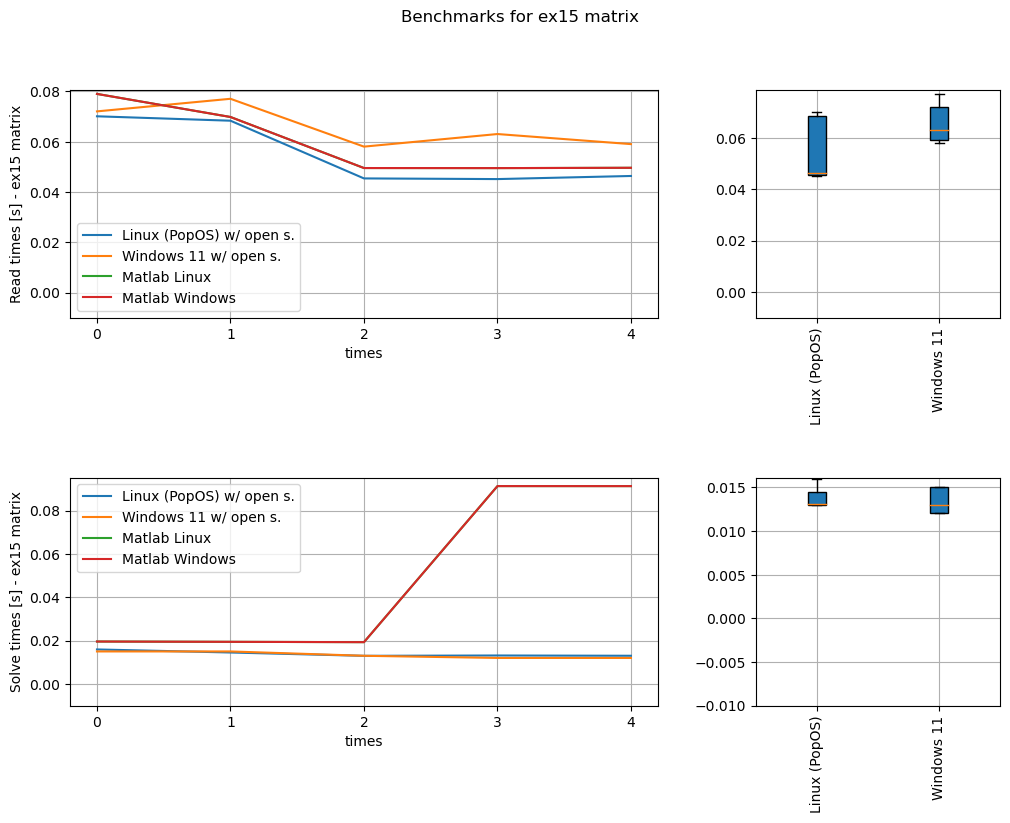

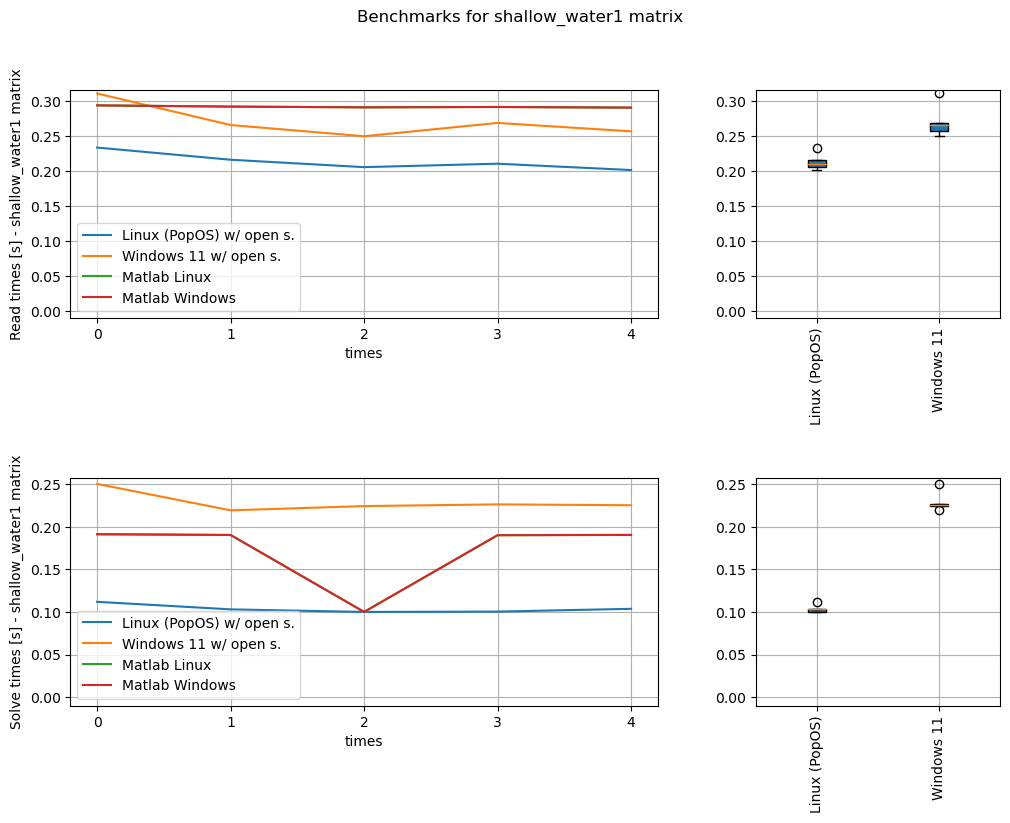

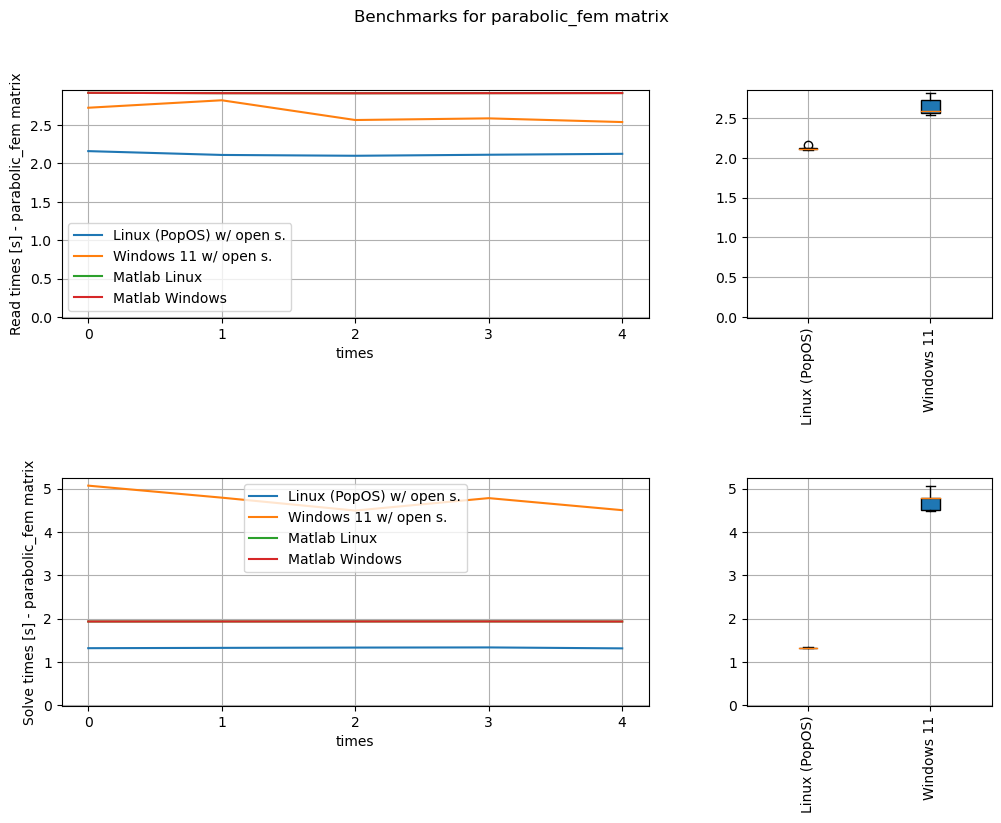

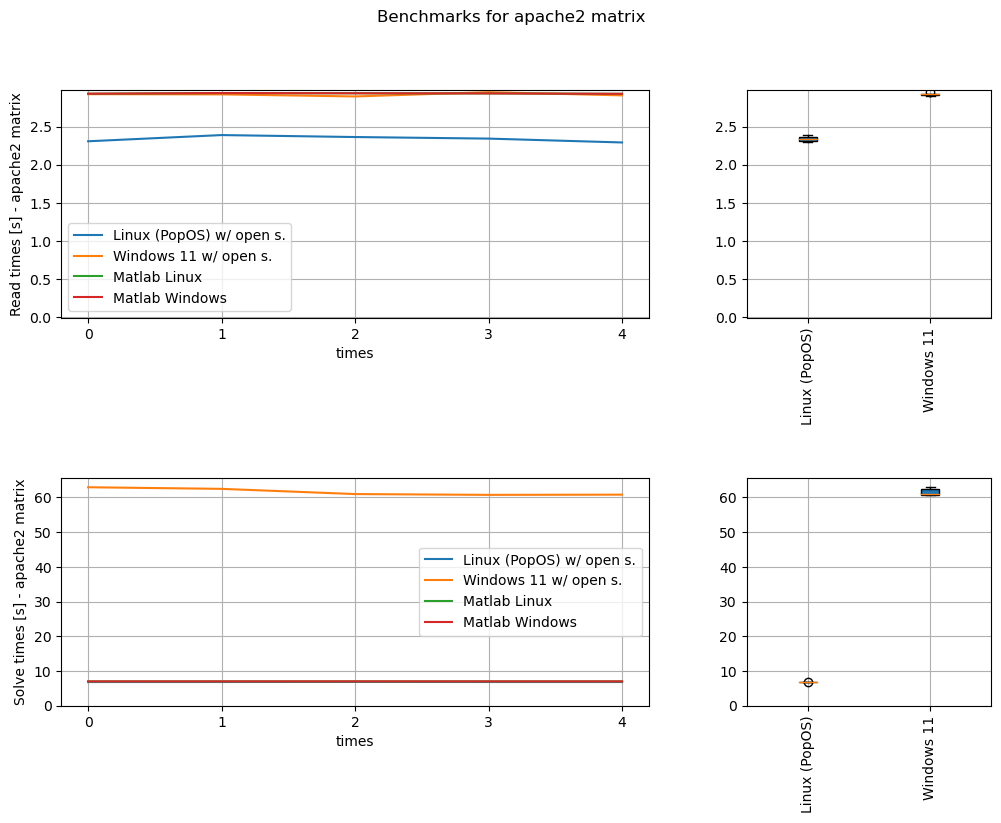

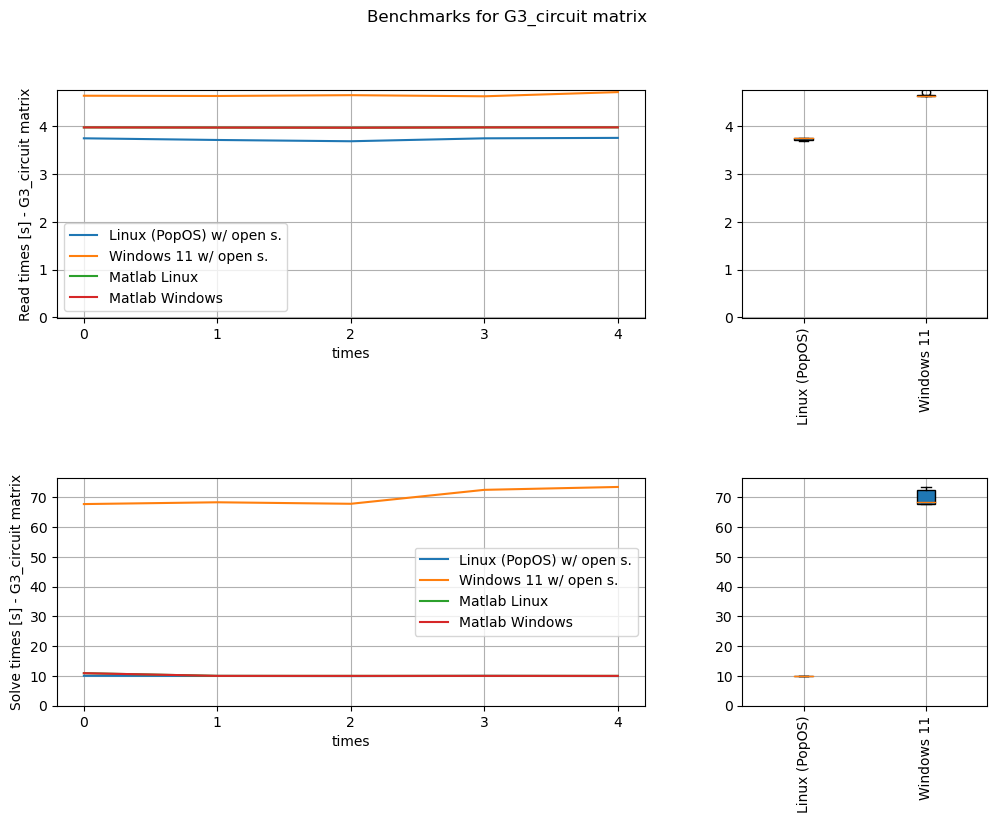

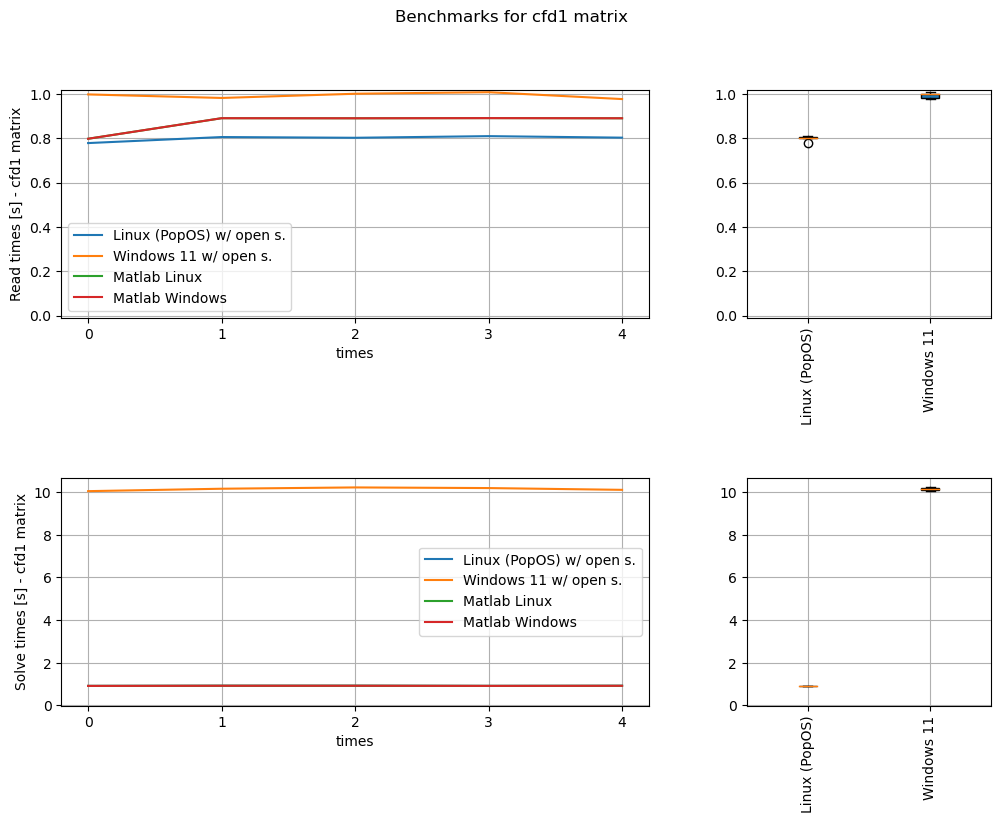

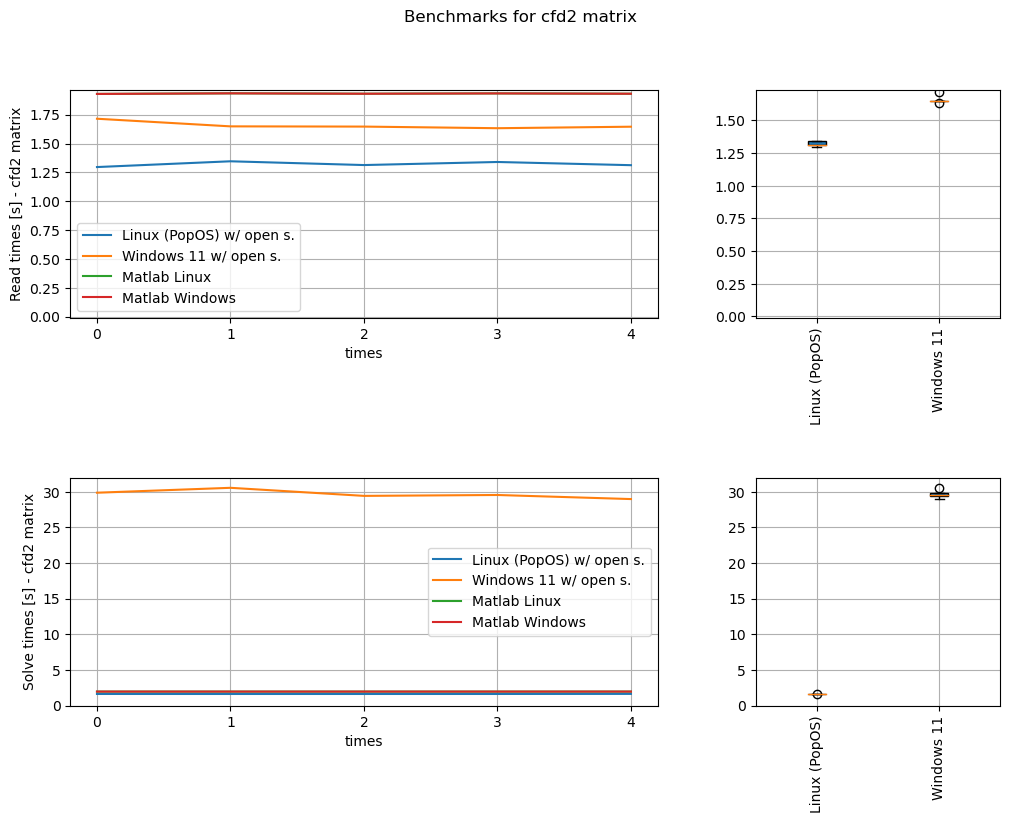

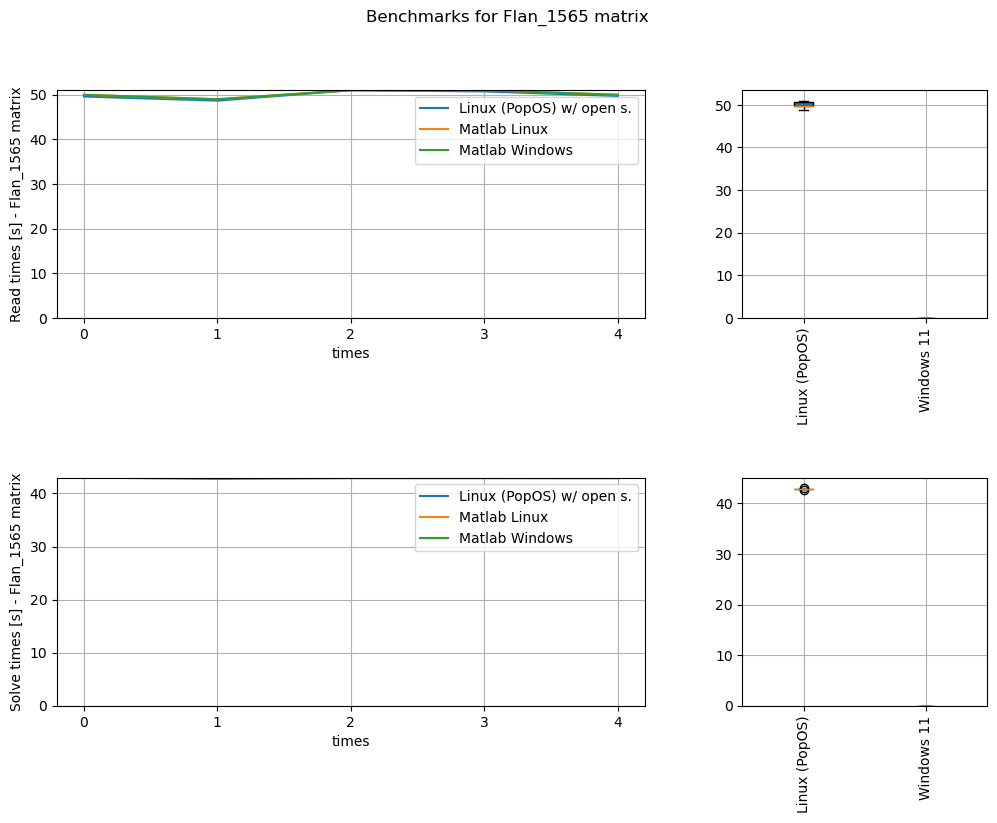

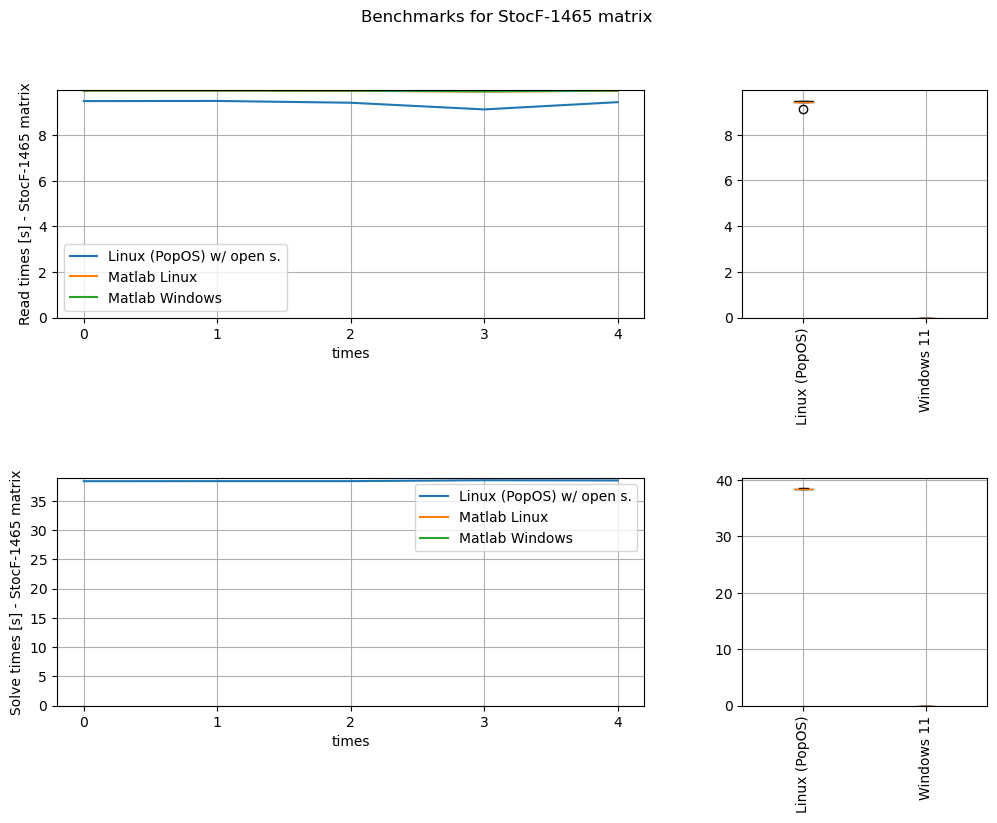

In [251]:
# chart su read times, boxplot su read times (3/4, 1/4)
# chart su solve times, boxplot su solve times (3/4, 1/4)

for matrixL, matrixW, matrixML, matrixMW in zip(benchmarks['Linux_4_luglio_2'], benchmarks['Windows_4_luglio'], benchmarks['MatlabWindows_'], benchmarks['MatlabLinux_']):
    fig = plt.figure(figsize = (12, 8), dpi = 100)
    fig.suptitle(f'Benchmarks for {matrixL["matrix"].split(".")[0]} matrix')

    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.7, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    
    # ax1.set_title(f'Read times [s] for {matrixL["matrix"].split(".")[0]} matrix')
    if matrixL["relative_error"] != 0:
        ax1.plot(matrixL["read_times"], label = 'Linux (PopOS) w/ open s.')
    if matrixW["relative_error"] != 0:
        ax1.plot(matrixW["read_times"], label = 'Windows 11 w/ open s.')
    if matrixML["relative_error"] != 0:
        ax1.plot(matrixML["read_times"], label = 'Matlab Linux')
    if matrixMW["relative_error"] != 0:
        ax1.plot(matrixMW["read_times"], label = 'Matlab Windows')
    ax1.set_xlabel('times')
    ax1.set_ylabel(f'Read times [s] - {matrixL["matrix"].split(".")[0]} matrix')
    ax1.set_xticks([0, 1, 2, 3, 4])
    ax1.set_ylim(bottom = -0.01)
    #if max(max(matrixL["read_times"]), max(matrixW["read_times"])) < 30:
    #    ax1.set_ylim(bottom = -0.2, top = max(max(matrixL["read_times"]), max(matrixW["read_times"])) + 1)
    #else:
    #    ax1.set_ylim(bottom = -0.2, top = max(max(matrixL["read_times"]), max(matrixW["read_times"])) + 10)
    ax1.legend()
    ax1.grid()



    ax2 = fig.add_subplot(grid[0, 2])
    ax2.boxplot([matrixL["read_times"], matrixW["read_times"]], patch_artist=True)
    ax2.set_xticklabels(['Linux (PopOS)', 'Windows 11'], rotation = 'vertical')
    ax2.set_ylim(bottom = -0.01)
    ax2.grid()


    ax3 = fig.add_subplot(grid[1, :2])
    # ax3.set_title(f'Solve times [s] for {matrixL["matrix"].split(".")[0]} matrix')
    if matrixL["relative_error"] != 0:
        ax3.plot(matrixL["solve_times"], label = 'Linux (PopOS) w/ open s.')
    if matrixW["relative_error"] != 0:
        ax3.plot(matrixW["solve_times"], label = 'Windows 11 w/ open s.')
    if matrixML["relative_error"] != 0:
        ax3.plot(matrixML["solve_times"], label = 'Matlab Linux')
    if matrixMW["relative_error"] != 0:
        ax3.plot(matrixMW["solve_times"], label = 'Matlab Windows')
    ax3.set_xlabel('times')
    ax3.set_ylabel(f'Solve times [s] - {matrixL["matrix"].split(".")[0]} matrix')
    ax3.set_xticks([0, 1, 2, 3, 4])
    ax3.set_ylim(bottom = -0.01)
    #if max(max(matrixL["solve_times"]), max(matrixW["solve_times"])) < 30:
    #    ax3.set_ylim(bottom = -0.2, top = max(max(matrixL["solve_times"]), max(matrixW["solve_times"])) + 1)
    #else:
    #    ax3.set_ylim(bottom = -0.2, top = max(max(matrixL["solve_times"]), max(matrixW["solve_times"])) + 10)
    ax3.legend()
    ax3.grid()
    

    ax4 = fig.add_subplot(grid[1, 2])
    ax4.boxplot([matrixL["solve_times"], matrixW["solve_times"]], patch_artist=True)
    ax4.set_xticklabels(['Linux (PopOS)', 'Windows 11'], rotation = 'vertical')
    ax4.set_ylim(bottom = -0.01)
    #if max(max(matrixL["solve_times"]), max(matrixW["solve_times"])) < 30:
    #    ax4.set_ylim(bottom = -0.2, top = max(max(matrixL["solve_times"]), max(matrixW["solve_times"])) + 1)
    #else:
    #    ax4.set_ylim(bottom = -0.2, top = max(max(matrixL["solve_times"]), max(matrixW["solve_times"])) + 10)
    ax4.grid()
    
    
    plt.show()

### Test plot 2

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

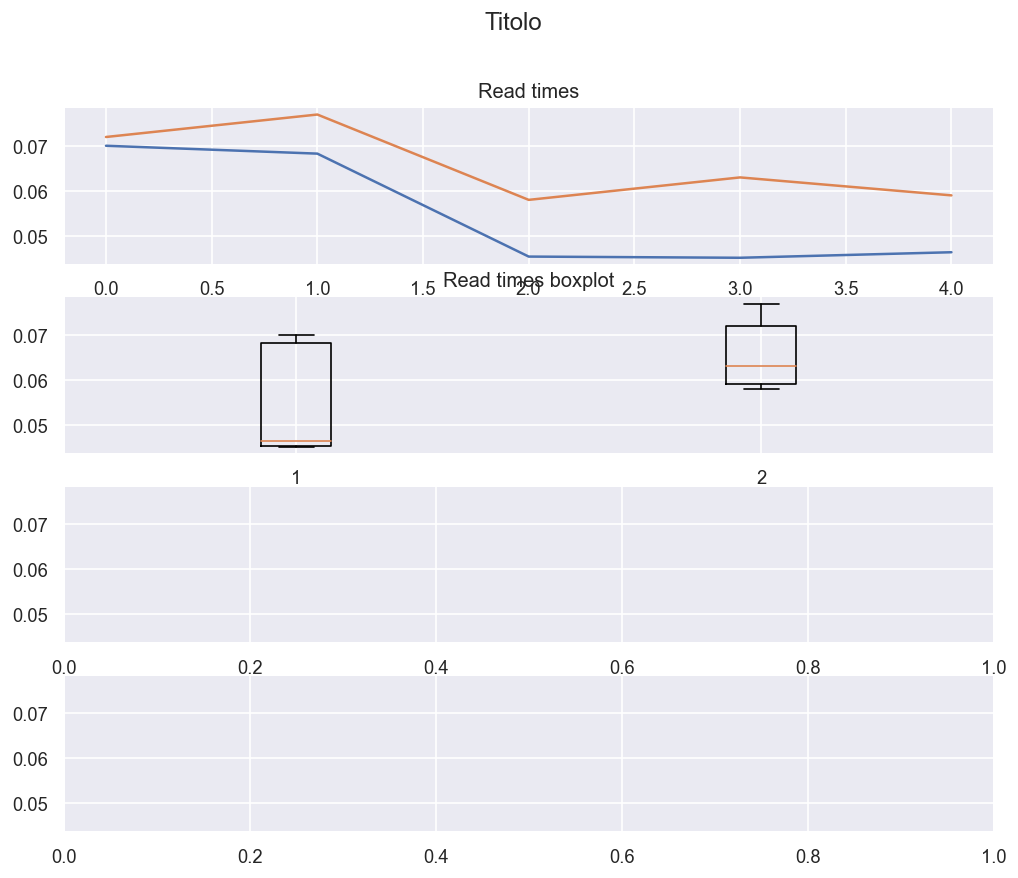

In [214]:

for matrixL, matrixW in zip(benchmarks['Linux_4_luglio_2'], benchmarks['Windows_4_luglio']):
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharey=True, dpi = 120)
    fig.suptitle('Titolo')

    
    axes[0].plot(matrixL['read_times'])
    axes[0].plot(matrixW['read_times'])
    # sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
    axes[0].set_title('Read times')


    axes[1].boxplot([matrixL['read_times'], matrixW['read_times']])
    # sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
    axes[1].set_title('Read times boxplot')


    sns.boxplot(ax=axes[2, 0], data=pokemon, x='Generation', y='Attack')
    # sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
    axes[2].set_title('Solve times')


    sns.boxplot(ax=axes[2, 0], data=pokemon, x='Generation', y='Attack')
    # sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
    axes[3].set_title('Solve times boxplot')

### Barplot

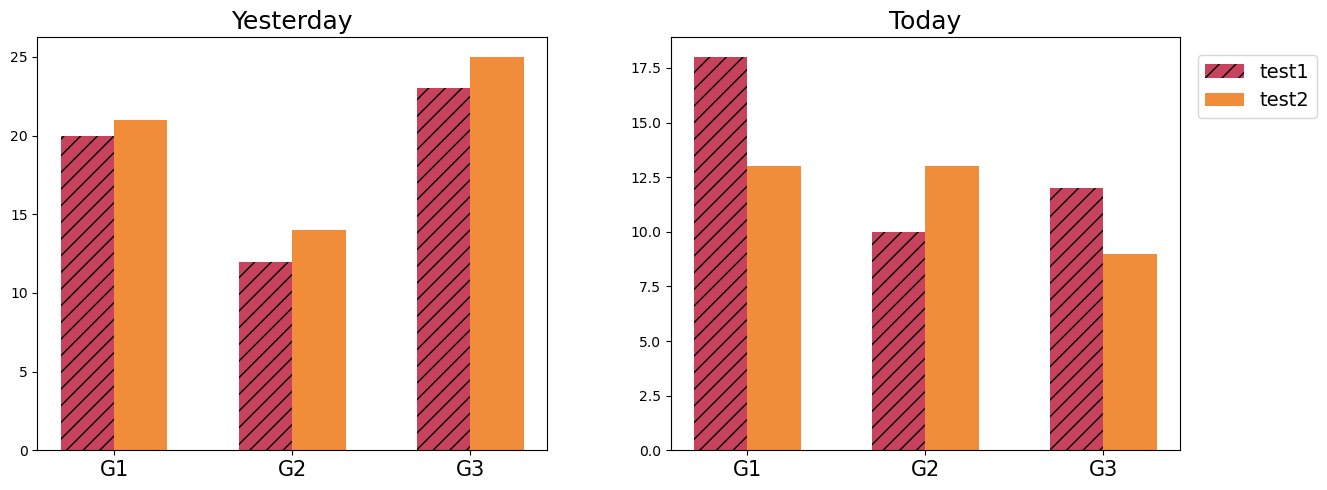

In [253]:
labels = ['G1', 'G2', 'G3']
yesterday_test1_mean = [20, 12, 23]
yesterday_test2_mean = [21, 14, 25]
today_test1_mean = [18, 10, 12]
today_test2_mean = [13, 13, 9]

x = np.arange(len(labels))
width = 0.3

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('Yesterday', fontsize=18)
plt.bar(x-width/2, yesterday_test1_mean, width, label='test1', hatch='//', color=np.array((199, 66, 92))/255)
plt.bar(x+width/2, yesterday_test2_mean, width, label='test2', color=np.array((240, 140, 58))/255)
plt.xticks([0,1,2], labels, fontsize=15)


plt.subplot(122)
plt.title('Today', fontsize=18)
plt.bar(x-width/2, today_test1_mean, width, hatch='//', color=np.array((199, 66, 92))/255)
plt.bar(x+width/2, today_test2_mean, width, color=np.array((240, 140, 58))/255)
plt.xticks([0,1,2], labels, fontsize=15)

plt.figlegend(loc='upper right', ncol=1, labelspacing=0.5, fontsize=14, bbox_to_anchor=(1.11, 0.9))
plt.tight_layout(w_pad=6)
plt.show()

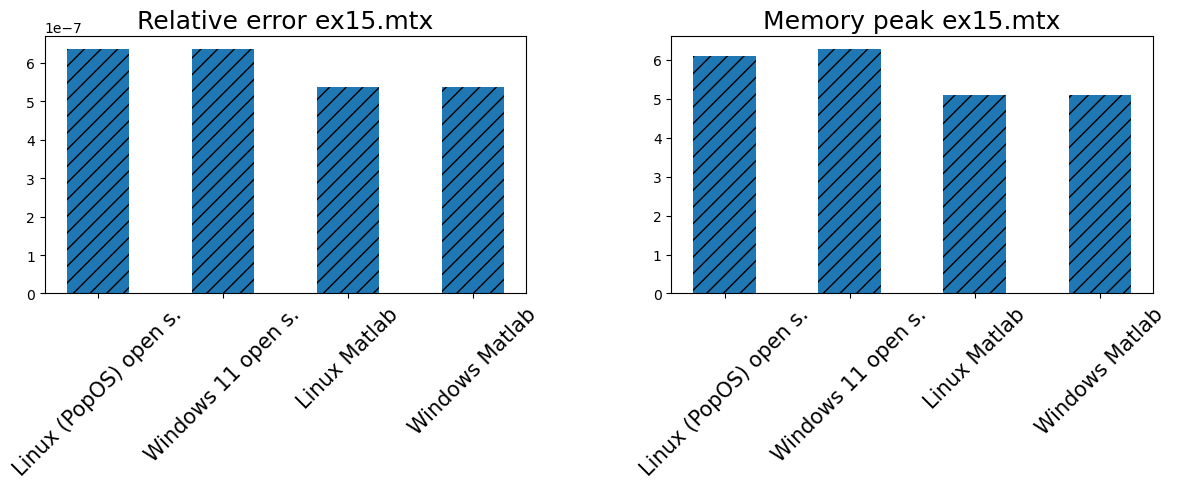

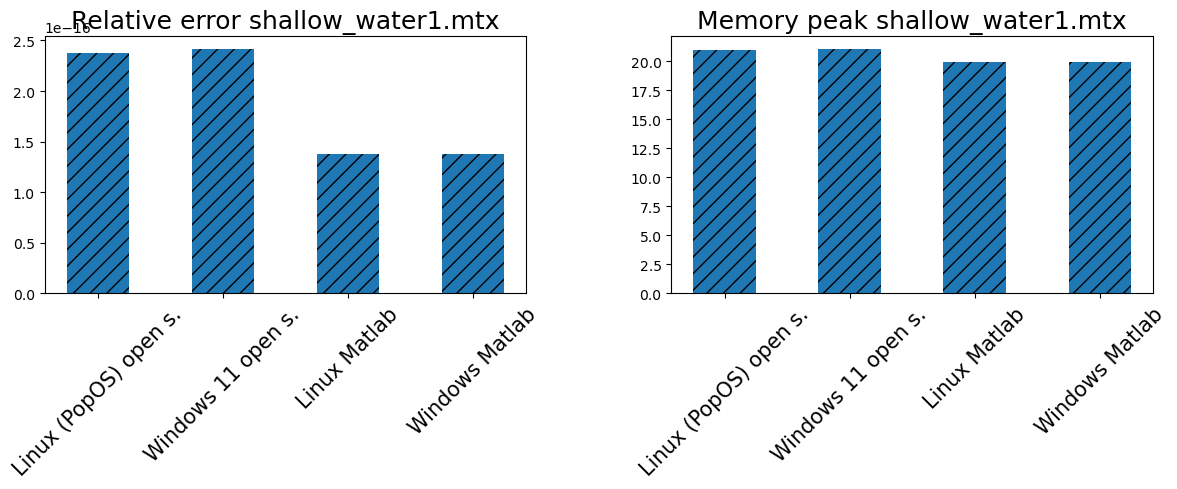

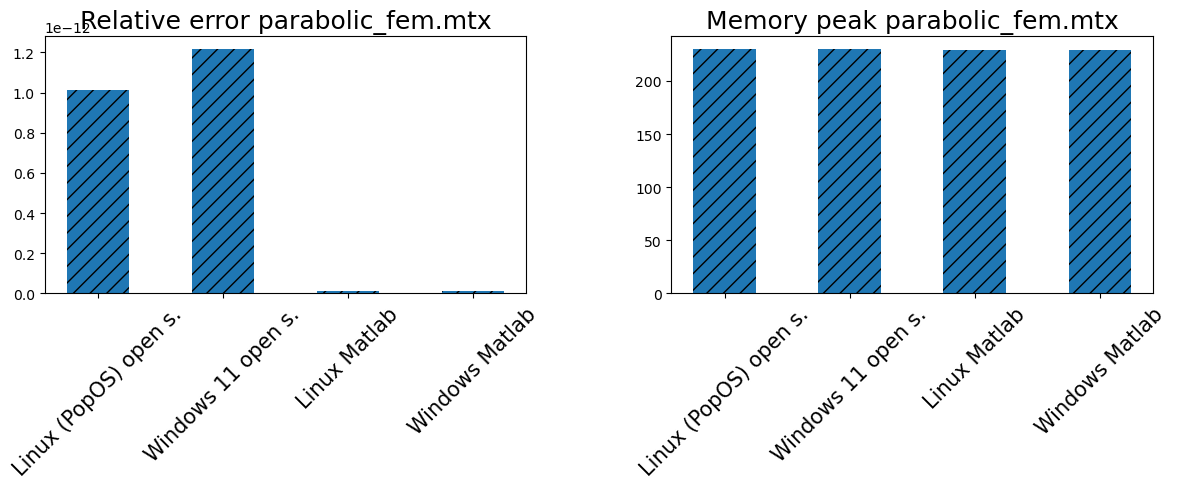

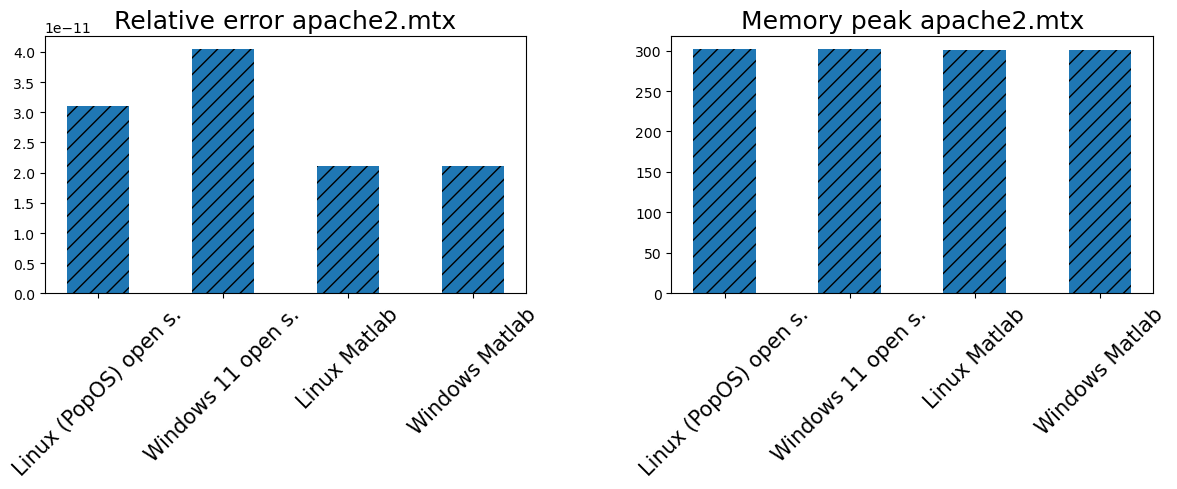

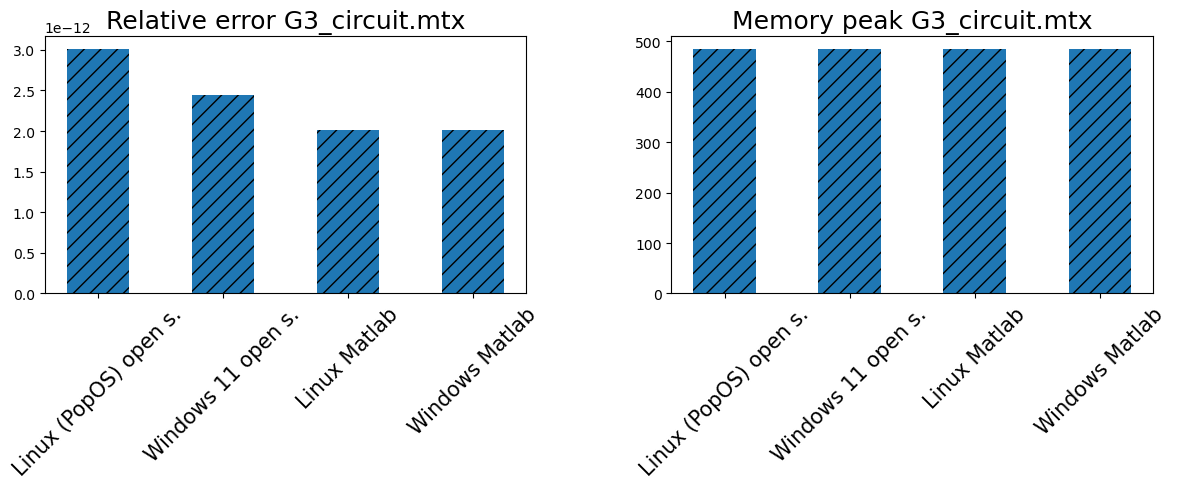

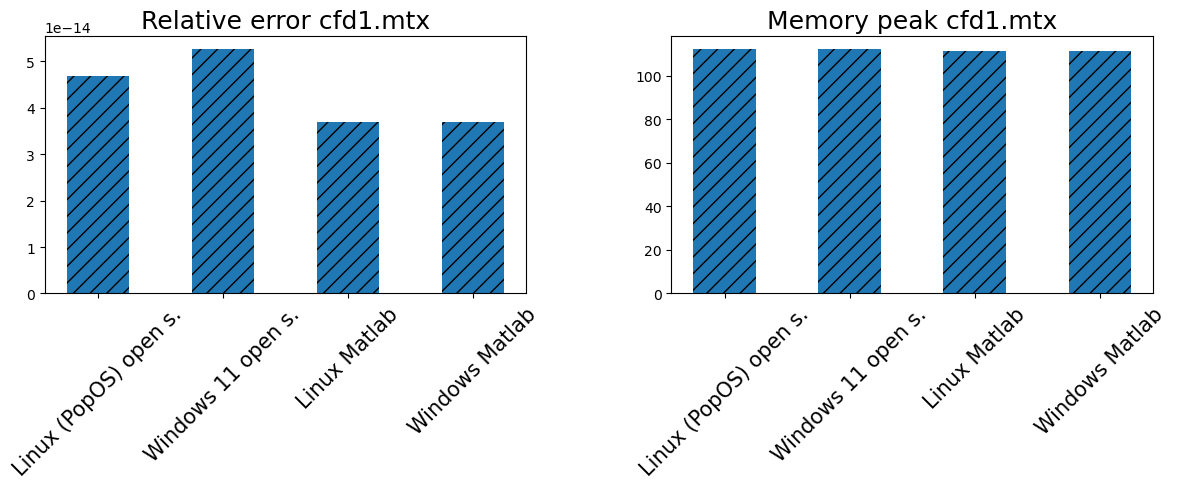

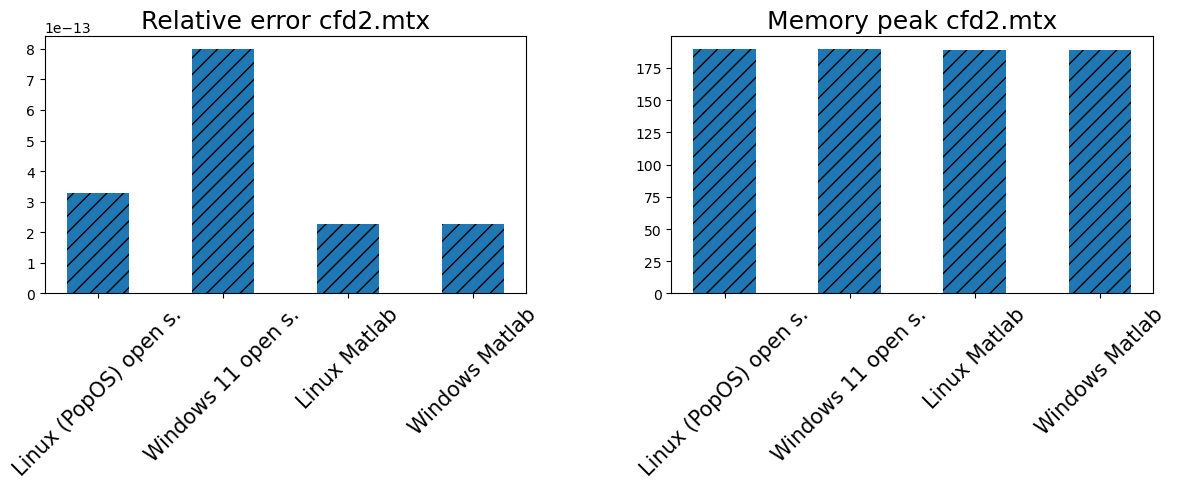

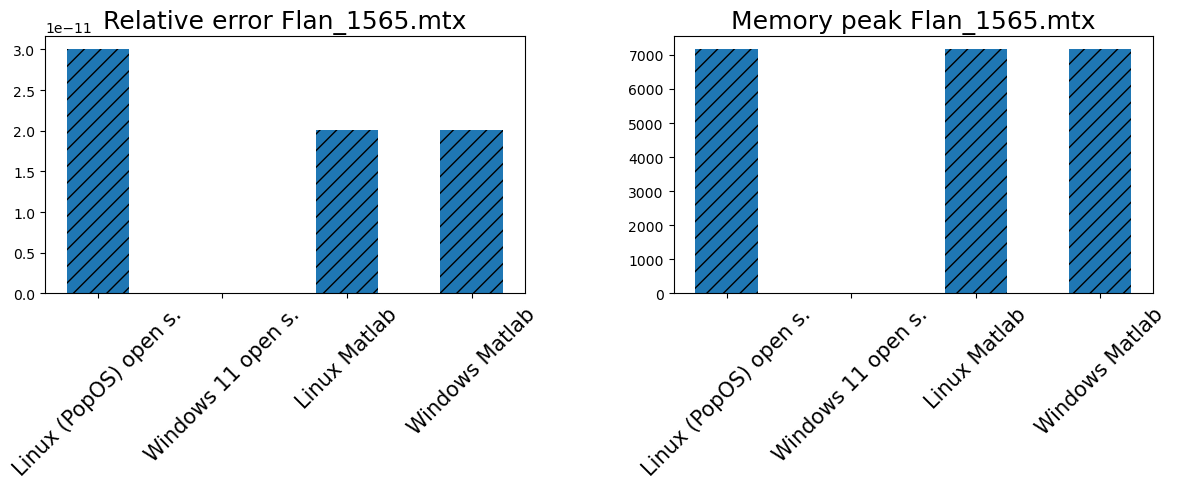

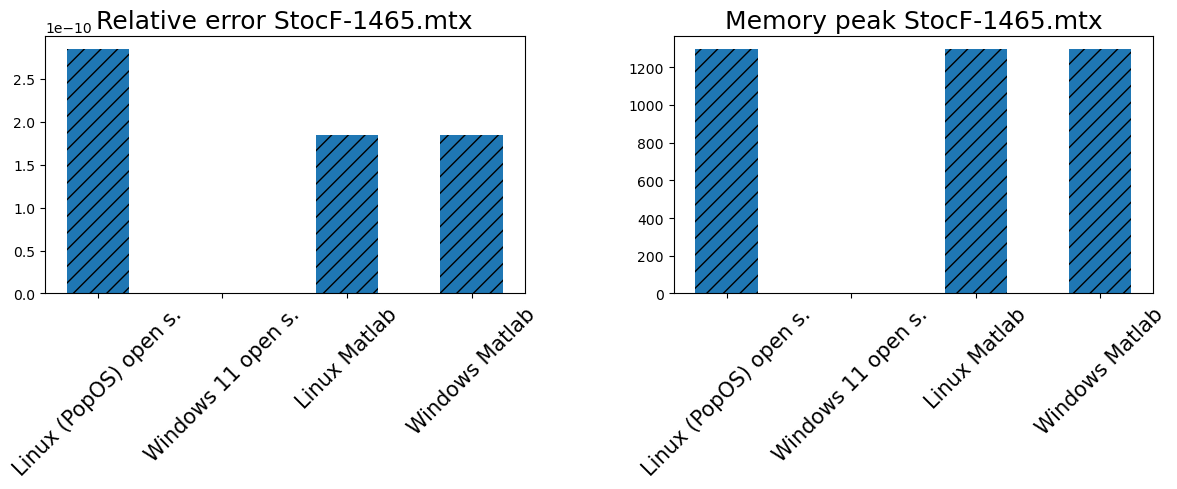

In [271]:
for matrixL, matrixW, matrixML, matrixMW in zip(benchmarks['Linux_4_luglio_2'], benchmarks['Windows_4_luglio'], benchmarks['MatlabWindows_'], benchmarks['MatlabLinux_']):
    labels = ['Linux (PopOS) open s.', 'Windows 11 open s.', 'Linux Matlab', 'Windows Matlab']
    error = [matrixL['relative_error'], matrixW['relative_error'], matrixML['relative_error'], matrixMW['relative_error']]
    memory = [matrixL['memory_peak'], matrixW['memory_peak'], matrixML['memory_peak'], matrixMW['memory_peak']]

    x = np.arange(len(labels))
    width = 0.5

    plt.figure(figsize=(12,5))

    plt.subplot(121)
    plt.title(f'Relative error {matrixL["matrix"]}', fontsize=18)
    plt.bar(x, error, width, label='test1', hatch='//')
    plt.xticks([0, 1, 2, 3], labels, fontsize=15, rotation = 45)

    plt.subplot(122)
    plt.title(f'Memory peak {matrixL["matrix"]}', fontsize=18)
    plt.bar(x, memory, width, hatch='//')
    plt.xticks([0, 1, 2, 3], labels, fontsize=15, rotation = 45)

    #plt.figlegend(loc='upper right', ncol=1, labelspacing=0.5, fontsize=14, bbox_to_anchor=(1.11, 0.9))
    plt.tight_layout(w_pad=6)
    
    plt.show()